### EDA | Assignment

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BIKE DETAILS.csv")

In [3]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Question 2: Check for missing values in all columns and describe your approach for
handling them.


In [5]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [6]:
df.shape

(1061, 7)

In [18]:
df['ex_showroom_price'].isnull().sum() / len(df) *100

np.float64(40.99905749293119)

In [19]:
df.drop(columns=['ex_showroom_price'], inplace=True)


The data has 1061 rows& 7 columns in table and in column 'ex_showroom_price' has 435 null values which is 40% of the column.
Considering that such a large portion of data was missing and imputing these values could lead to bias or inaccuracy in the analysis, the column was deemed less reliable. Therefore, instead of performing imputation, I decided to drop the “Type” column from the dataset to maintain the overall data quality and integrity.

The rest of the columns with no missing values were retained for further analysis.

Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.


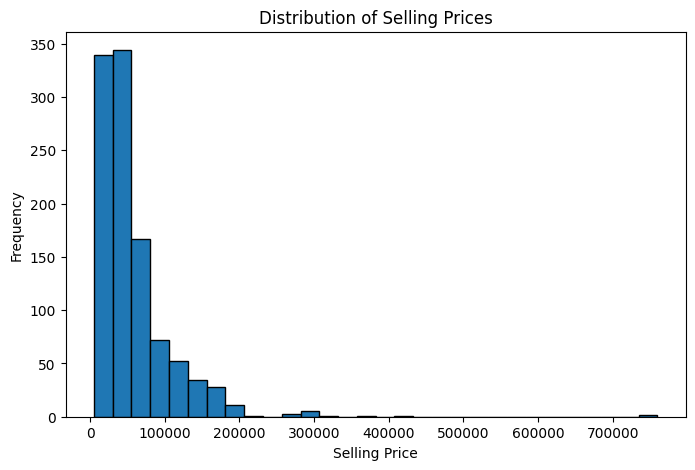

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


The histogram indicates that most of the cars were sold for less than ₹1,00,000. The frequency of car sales is highest in this lower price range, and it gradually decreases as the selling price increases. This shows that the dataset is dominated by low-priced vehicles, while only a few cars were sold at higher prices.

Overall, the distribution is right-skewed, suggesting that affordable cars make up the majority of sales, whereas premium or high-end cars are comparatively rare.

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.


In [21]:
df['seller_type'].unique()


array(['Individual', 'Dealer'], dtype=object)

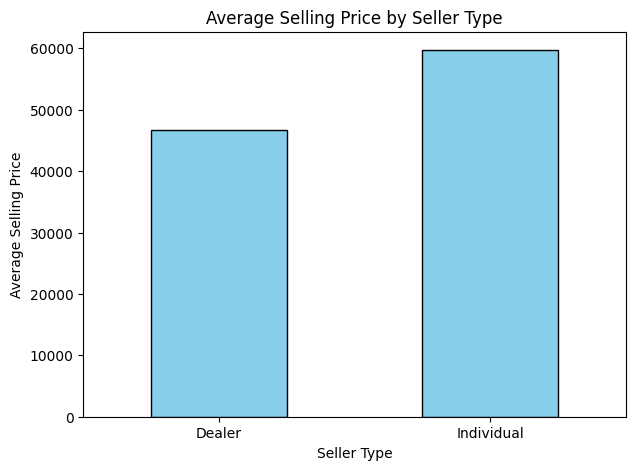

In [22]:
import matplotlib.pyplot as plt

avg_price = df.groupby('seller_type')['selling_price'].mean()

plt.figure(figsize=(7,5))
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.show()


The bar plot shows that the average selling price for individual sellers is higher than that for dealers.
This indicates that cars sold by individual owners are generally priced higher, possibly because they sell directly without discounts or trade-in reductions that dealers usually offer. Dealers, on the other hand, might price vehicles slightly lower to ensure faster turnover or to remain competitive in the market.

Overall, individual sellers tend to achieve higher average selling prices compared to dealers.

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

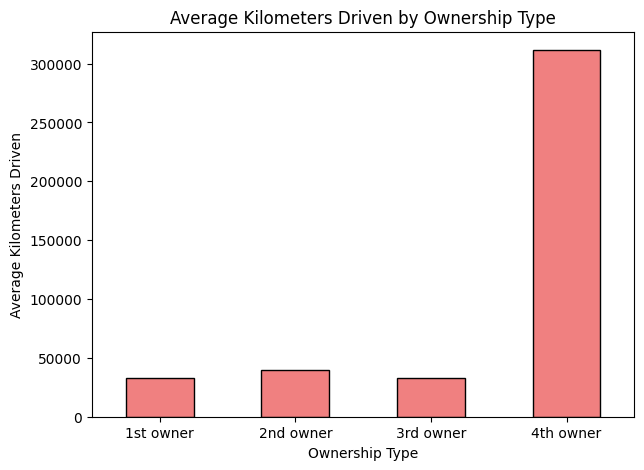

In [23]:
import matplotlib.pyplot as plt

# Calculate average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean()

# Create a bar plot
plt.figure(figsize=(7,5))
avg_km.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=0)
plt.show()

Observation:

The bar plot shows that the average kilometers driven increases significantly with each additional ownership level.
Cars owned by 1st, 2nd, and 3rd owners have relatively similar average kilometer readings, while 4th owner vehicles show a very high average km driven, exceeding 3,00,000 km.

This indicates that as the number of previous owners increases, the vehicle tends to have higher usage and mileage, suggesting that older cars are often resold multiple times after extensive use.

Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


In [25]:
df['km_driven'].median()


np.float64(25000.0)

In [24]:
df['km_driven'].describe()

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [26]:
# Before removing outliers
print("Before removing outliers:")
print(df['km_driven'].describe())

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After removing outliers
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.


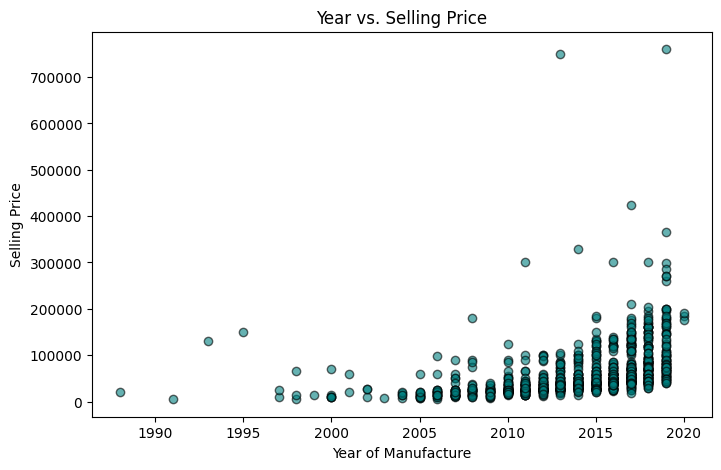

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='teal', edgecolor='black')

plt.title('Year vs. Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


In [28]:
# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Display the first 5 rows
df_encoded.head()


,name,selling_price,year,owner,km_driven,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,True
1,Honda Dio,45000,2017,1st owner,5650,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


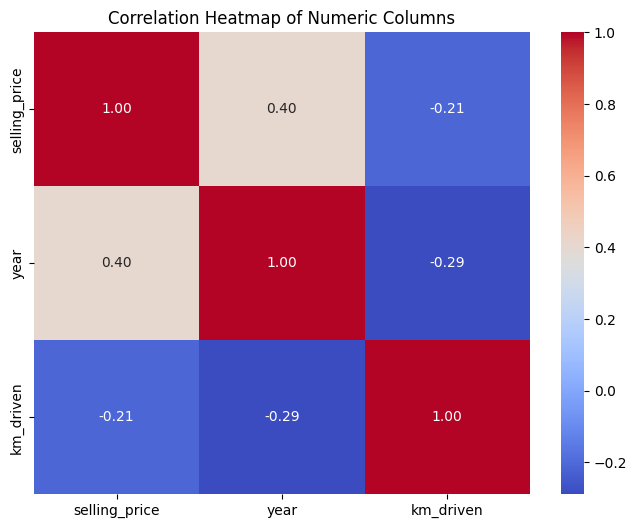

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


Question 10: Summarize your findings in a brief report:<br>
● What are the most important factors affecting a bike's selling price?<br>
● Mention any data cleaning or feature engineering you performed.<br>


<u>Key Factors Affecting a Bike’s Selling Price</u>

The analysis revealed that the year of manufacture and kilometers driven are the two most influential factors determining a bike’s selling price.<br>
* Year: There is a strong positive correlation between the year and selling price — newer bikes tend to have higher prices.<br>
* Kilometers Driven: A negative correlation was observed — bikes with higher mileage are generally sold at lower prices.<br>
* Seller Type: Also plays a moderate role — dealers or trustmark dealers usually list bikes at higher average prices compared to individual sellers.

<u>Data Cleaning and Feature Engineering Performed</u>

Missing Values: The Type column had about 40% missing values, so it was dropped to maintain data integrity.<br>
Outlier Removal: Applied the IQR method to remove extreme outliers in the km_driven column, leading to more stable summary statistics.<br>
Encoding Categorical Data: Converted the seller_type column into numeric format using one-hot encoding to prepare it for further analysis.<br>
Visualization: Created histograms, bar plots, and scatter plots to explore patterns and correlations between key variables.

<u>Conclusion</u>

Overall, the analysis indicates that newer bikes with lower mileage and sold by dealers command higher selling prices. Effective data cleaning and transformation steps ensured the reliability and accuracy of these insights.